# Effect of Fuel Prices on Mobility

## 1. Introduction

In this work, some statistical analysis and tests are presented using Google's mobility report during COVID19 pandemic and related data from other various sources. 

**Aim**

The aim of this study is to compare mobility changes to investigate the effects of change in fuel prices on mobility behaviour.

**Methodology**

It is quite difficult to compare mobility during pandemic era, since the mobility change has fluctuated for various reasons. 
<li>To observe the effects of fuel prices more clearly, Turkey is selected as sample, since due to the ecenomic situation in Turkey in the recent years, the fuel prices has tripled. 
<li>To eliminate other effects, the time frame of festing holidays in 2021 and 2022 are selected.

<br><br>

**Other Studies**

Data collection and data cleaning process is explained here: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/data-collection-merging-and-cleaning/mobility-dataframe-preparation.ipynb

This data is visualized with Tableau. You can check that from the following link: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/data-visualization-tableau/data-visualization-tableau.ipynb

Python Data Visualization: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/data-visualization-python-jupyter/mobility-data-analysis-visualization.ipynb

<li>This dataframe is used in machine learning algorithm studies like regression and clustering.

https://github.com/DrFarukAydin/data-science-portfolio/blob/main/machine-learning/mobility-cluster.ipynb

<br><br>

## 2. Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [18]:
df = pd.read_csv("../Traffic Studies/final_df.csv", low_memory=False)

In [4]:
df.head()

,Unnamed: 0,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,...,ilce_kademe,il_skor,il_kademe,Kurşunsuz Benzin,Motorin,precipitation [mm/day],rain,MINIMUM_TRAFFIC_INDEX,MAXIMUM_TRAFFIC_INDEX,AVERAGE_TRAFFIC_INDEX
0,0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430715 entries, 0 to 10430714
Data columns (total 36 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   Unnamed: 0                                          int64  
 1   country_region_code                                 object 
 2   country_region                                      object 
 3   sub_region_1                                        object 
 4   sub_region_2                                        object 
 5   metro_area                                          object 
 6   iso_3166_2_code                                     object 
 7   census_fips_code                                    float64
 8   place_id                                            object 
 9   date                                                object 
 10  retail_and_recreation_percent_change_from_baseline  float64
 11  grocery_and_pharmacy_percent_change

In [20]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [21]:
df["date"] = pd.to_datetime(df["date"])

In [22]:
df["year"] = df["date"].apply(lambda x: x.year)
df["month"] = df["date"].apply(lambda x: x.month)
df["day"] = df["date"].apply(lambda x: x.day)

In [23]:
mobility_cols = ['retail_and_recreation_percent_change_from_baseline',
                 'grocery_and_pharmacy_percent_change_from_baseline',
                 'parks_percent_change_from_baseline',
                 'transit_stations_percent_change_from_baseline',
                 'workplaces_percent_change_from_baseline',
                 'residential_percent_change_from_baseline', 
                 'mean_percent_change']

In [24]:
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,...,precipitation [mm/day],rain,MINIMUM_TRAFFIC_INDEX,MAXIMUM_TRAFFIC_INDEX,AVERAGE_TRAFFIC_INDEX,Kurşunsuz Benzin,Motorin,year,month,day
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,15
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,16
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,17
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,18
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2,19


<br><br><br>

## 3. Methodology

### 3.1. Selecting Sample Time Range

**Festive Holidays (Bayram Tatilleri)**
<br>
<li> Ramazan Bayramı: 13 May - 16 May 2021 (4 days)
<li> Kurban Bayramı: 17 July - 25 July 2021 (9 Days)
<br><br>
<li> Ramazan Bayramı: 30 April - 4 May 2022 (5 days)
<li> Kurban Bayramı: 9 July - 17 July 2022 (9 days)
<br>


It is more reasonable to compare "Kurban Bayramı" holidays, since the dates of the years are very close and the duration is the same.

<br><br>

### 3.2. Preparing Data Frame

In [30]:
df_holiday_2021 = df[(df["date"] > "2021-07-16") & (df["date"] < "2021-07-26") & (df["country_region_code"] == "TR")]

In [117]:
df_holiday_2021["holiday"] = 2021

/var/folders/k5/yg__kmls5zndgtyl75h907040000gn/T/ipykernel_26834/3168443174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_holiday_2021["holiday"] = 2021


In [31]:
df_holiday_2022 = df[(df["date"] > "2022-07-08") & (df["date"] < "2022-07-18") & (df["country_region_code"] == "TR")]

In [118]:
df_holiday_2022["holiday"] = 2022

/var/folders/k5/yg__kmls5zndgtyl75h907040000gn/T/ipykernel_26834/460269752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_holiday_2022["holiday"] = 2022


In [119]:
df_holiday = pd.concat([df_holiday_2021,df_holiday_2022])

In [120]:
dates = df_holiday.groupby("date", as_index=False).mean()["date"]

In [121]:
df_dates = pd.concat([pd.DataFrame({"date": dates[:9], "days_of_holiday": range(1,10)}),pd.DataFrame({"date": dates[9:], "days_of_holiday": range(1,10)})])

In [122]:
df_dates

,date,days_of_holiday
0,2021-07-17,1
1,2021-07-18,2
2,2021-07-19,3
3,2021-07-20,4
4,2021-07-21,5
5,2021-07-22,6
6,2021-07-23,7
7,2021-07-24,8
8,2021-07-25,9
9,2022-07-09,1


In [123]:
df_holiday = df_holiday.merge(df_dates, how="left", on = "date")

In [124]:
df_holiday.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,...,MINIMUM_TRAFFIC_INDEX,MAXIMUM_TRAFFIC_INDEX,AVERAGE_TRAFFIC_INDEX,Kurşunsuz Benzin,Motorin,year,month,day,holiday,days_of_holiday
0,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-07-17,7.0,...,NaN,NaN,NaN,7.74,7.25,2021,7,17,2021,1
1,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-07-18,11.0,...,NaN,NaN,NaN,7.74,7.25,2021,7,18,2021,2
2,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-07-19,29.0,...,NaN,NaN,NaN,7.74,7.25,2021,7,19,2021,3
3,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-07-20,-26.0,...,NaN,NaN,NaN,7.74,7.25,2021,7,20,2021,4
4,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2021-07-21,-10.0,...,NaN,NaN,NaN,7.74,7.25,2021,7,21,2021,5


<br><br>

### 3.3. Visualizing Mobility and Fuel Prices

''

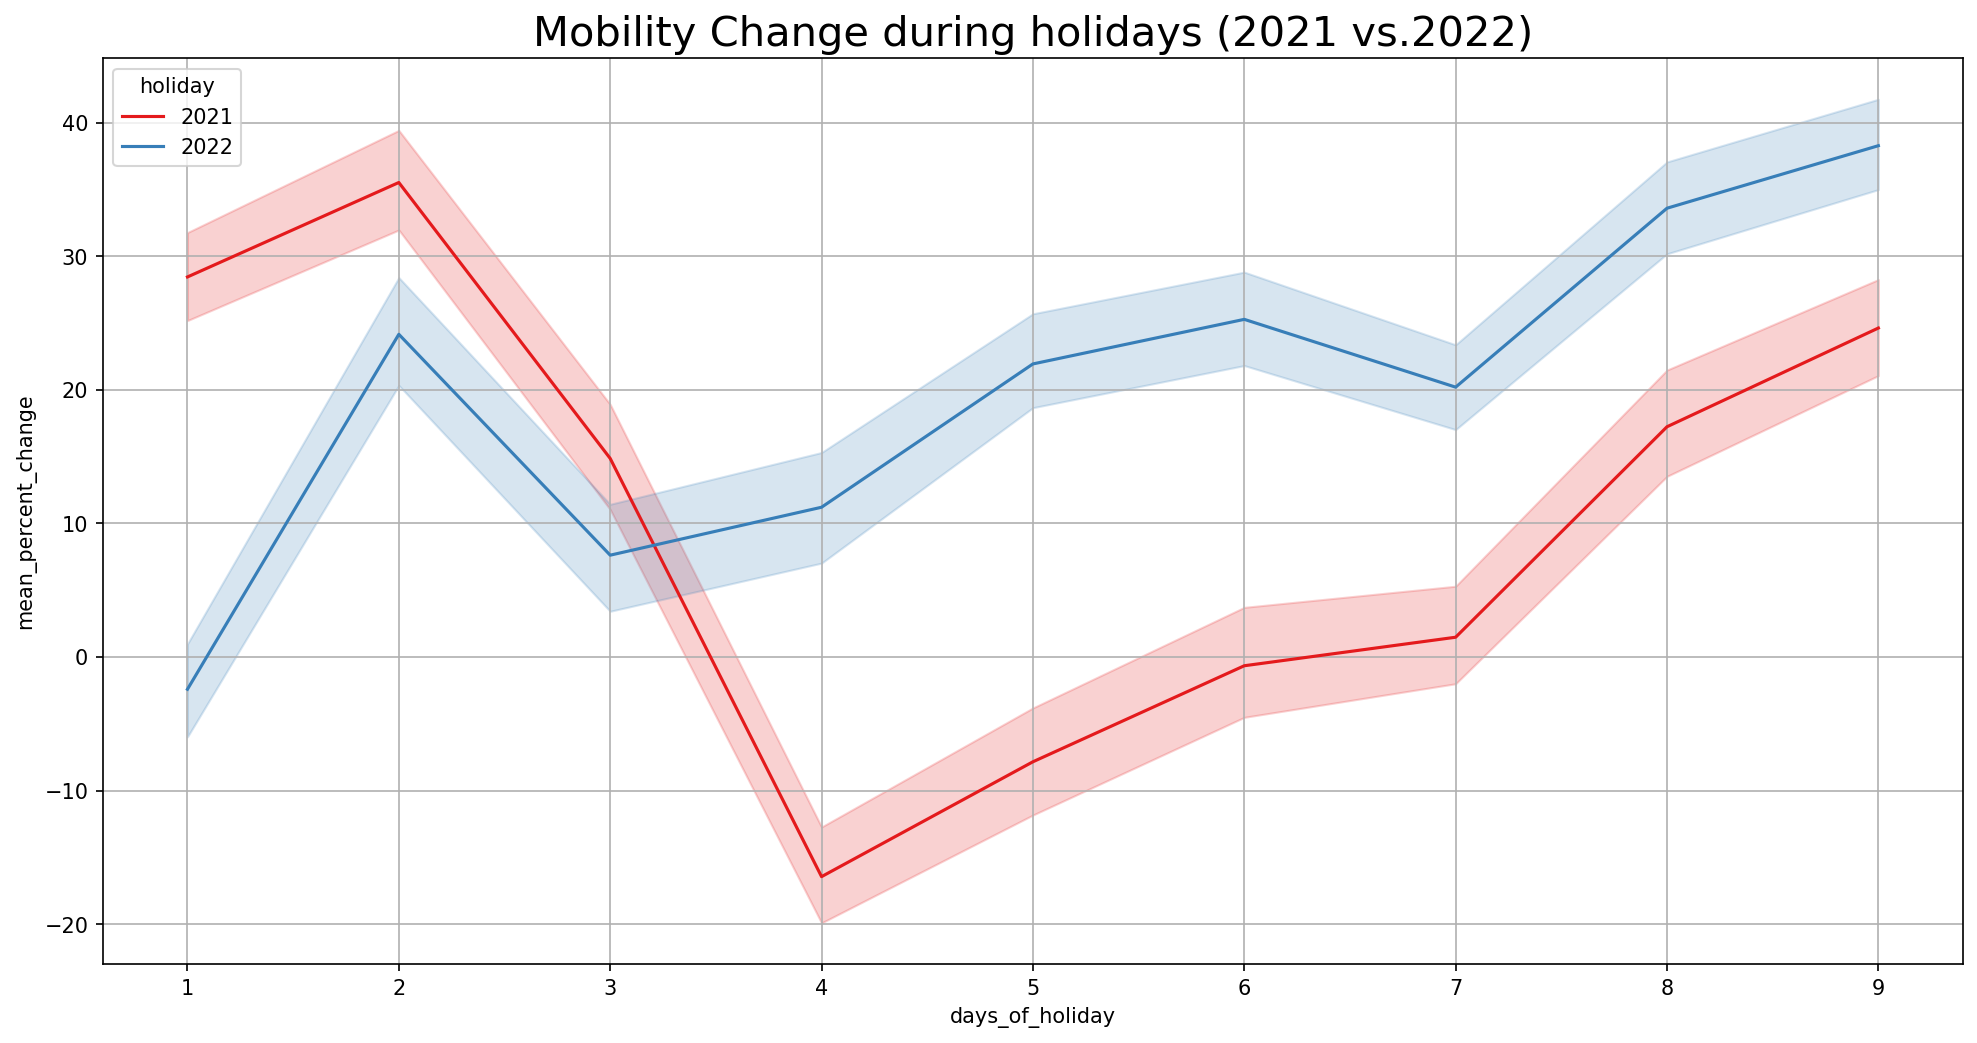

In [125]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(16,8),dpi=150)

sns.lineplot(data=df_holiday, x="days_of_holiday", y="mean_percent_change", 
         ax=ax, hue="holiday",palette="Set1")



plt.grid()

plt.title("Mobility Change during holidays (2021 vs.2022)", fontsize=20)
;

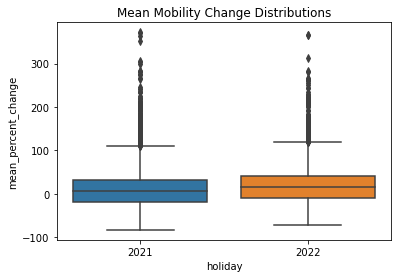

In [139]:
sns.boxplot(data=df_holiday, y = "mean_percent_change", x = "holiday")
plt.title ("Mean Mobility Change Distributions");

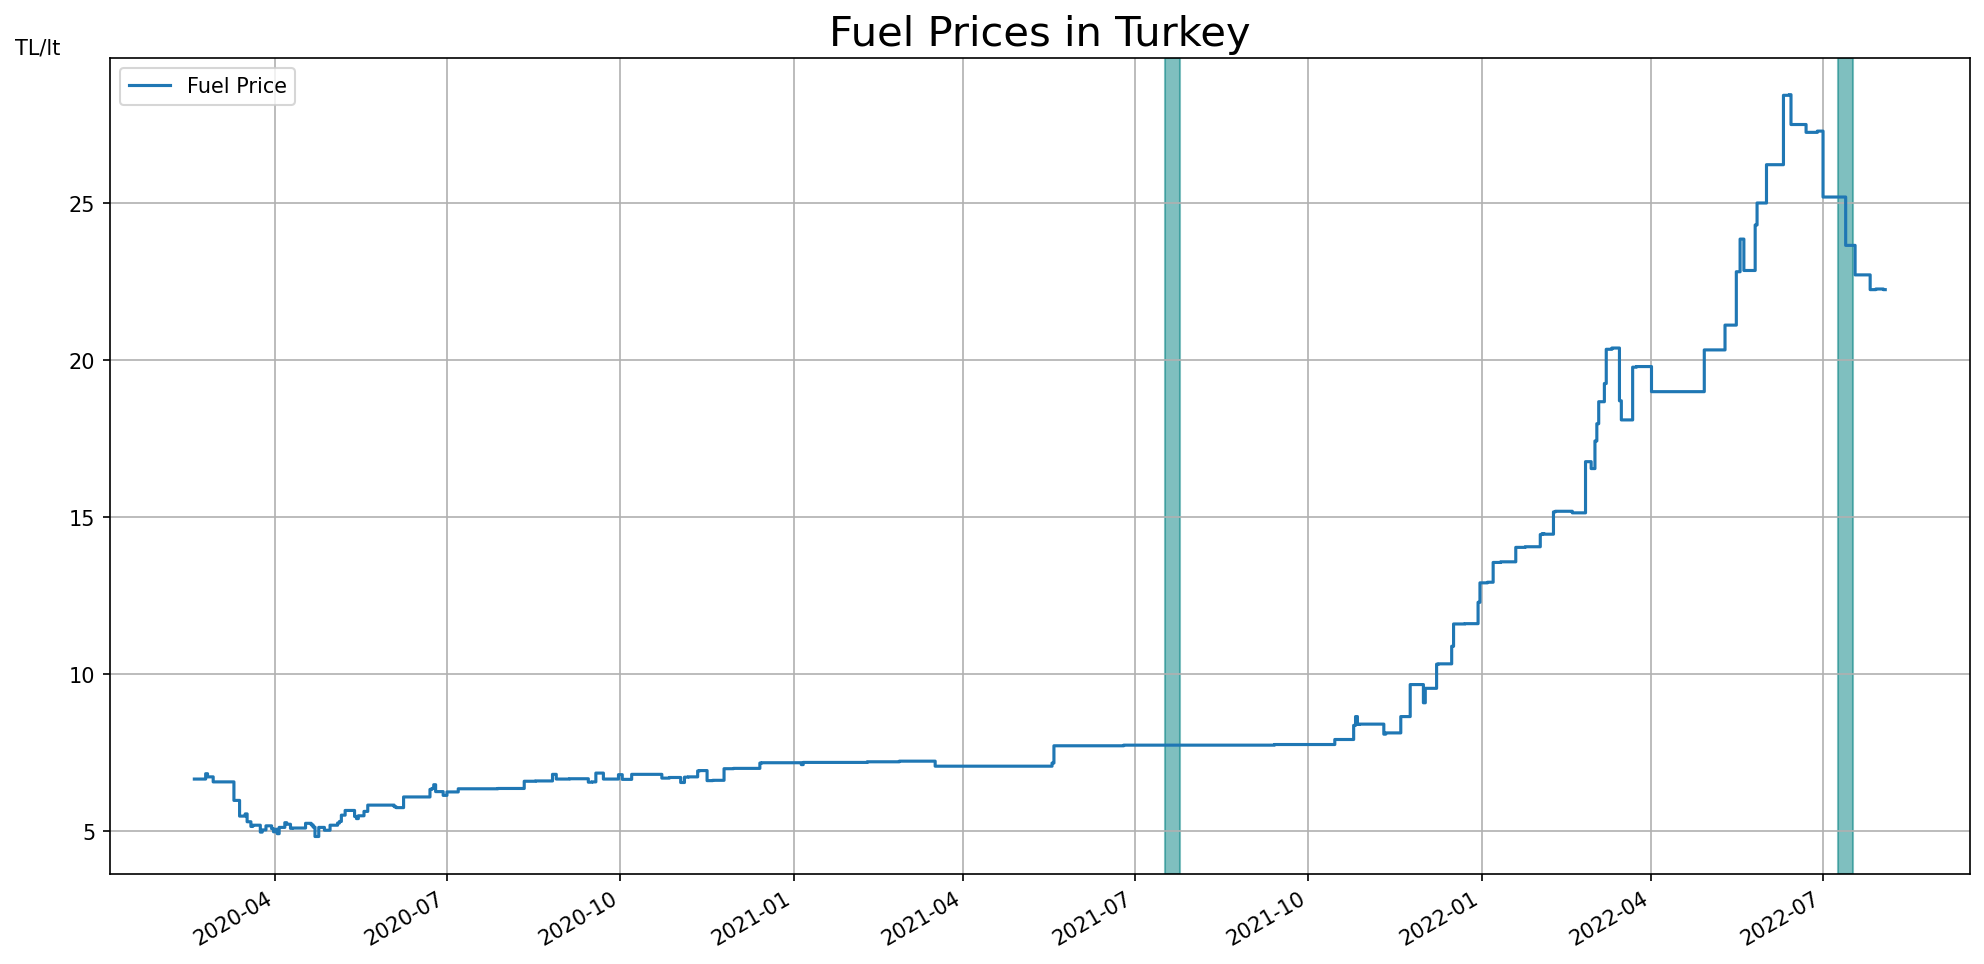

In [137]:
import matplotlib.dates as mdates
import datetime
fig, ax = plt.subplots(figsize=(16,8),dpi=150)
l1 = sns.lineplot(data=df[df["country_region_code"] == "TR"].groupby("date",as_index=False).mean(), x= "date", y="Kurşunsuz Benzin", label="Fuel Price", drawstyle='steps-pre')

plt.ylabel("TL/lt",loc = "top", rotation=0)
plt.xlabel("")

plt.grid()

plt.axvspan(mdates.date2num(datetime.datetime(2021,7,17)), mdates.date2num(datetime.datetime(2021,7,25)), color='teal', alpha=0.5,
           )
plt.axvspan(mdates.date2num(datetime.datetime(2022,7,9)), mdates.date2num(datetime.datetime(2022,7,17)), color='teal', alpha=0.5,
           )

## Rotate date labels automatically
fig.autofmt_xdate()
plt.title("Fuel Prices in Turkey", fontsize=20)
plt.legend();

**Discussion:** It is obvious that mobility change has increased from 2021 to 2022, whereas, the fuel prices has tripled.

<br><br><br>

## 4. Statistical Analysis

### 4.1. Selection of Statistical Test

I have prepared the following flowchart to select proper statistical test for this work.

<img src='statistical-test-flowchart.png'/>

<b>Source:</b> Dr. Ömer Faruk Aydın

<br><br>

### 4.2. Determination of Data Distribution

In [40]:
df_holiday[mobility_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
retail_and_recreation_percent_change_from_baseline,5727.0,25.623538,51.044125,-73.0,-9.000000,18.0,51.0,335.0
grocery_and_pharmacy_percent_change_from_baseline,5577.0,64.334409,62.731719,-68.0,20.000000,53.0,98.0,485.0
parks_percent_change_from_baseline,4497.0,111.182344,101.003458,-52.0,42.000000,88.0,155.0,762.0
transit_stations_percent_change_from_baseline,4634.0,50.435693,63.897476,-80.0,6.000000,37.0,84.0,462.0
workplaces_percent_change_from_baseline,9768.0,-31.331388,30.270729,-86.0,-57.000000,-31.0,-10.0,188.0
residential_percent_change_from_baseline,6276.0,-0.056087,5.219153,-17.0,-4.000000,0.0,4.0,19.0
mean_percent_change,9961.0,14.799376,47.557227,-83.0,-14.833333,10.0,37.5,372.0


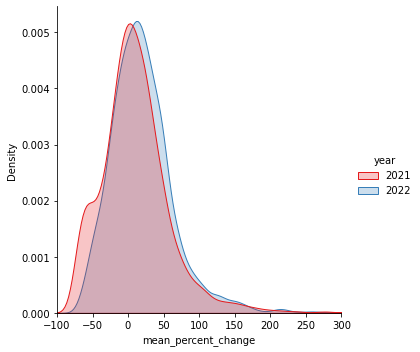

In [43]:
sns.displot(df_holiday, x="mean_percent_change", hue="year", kind="kde", fill=True, palette="Set1")
plt.xlim(-100,300);

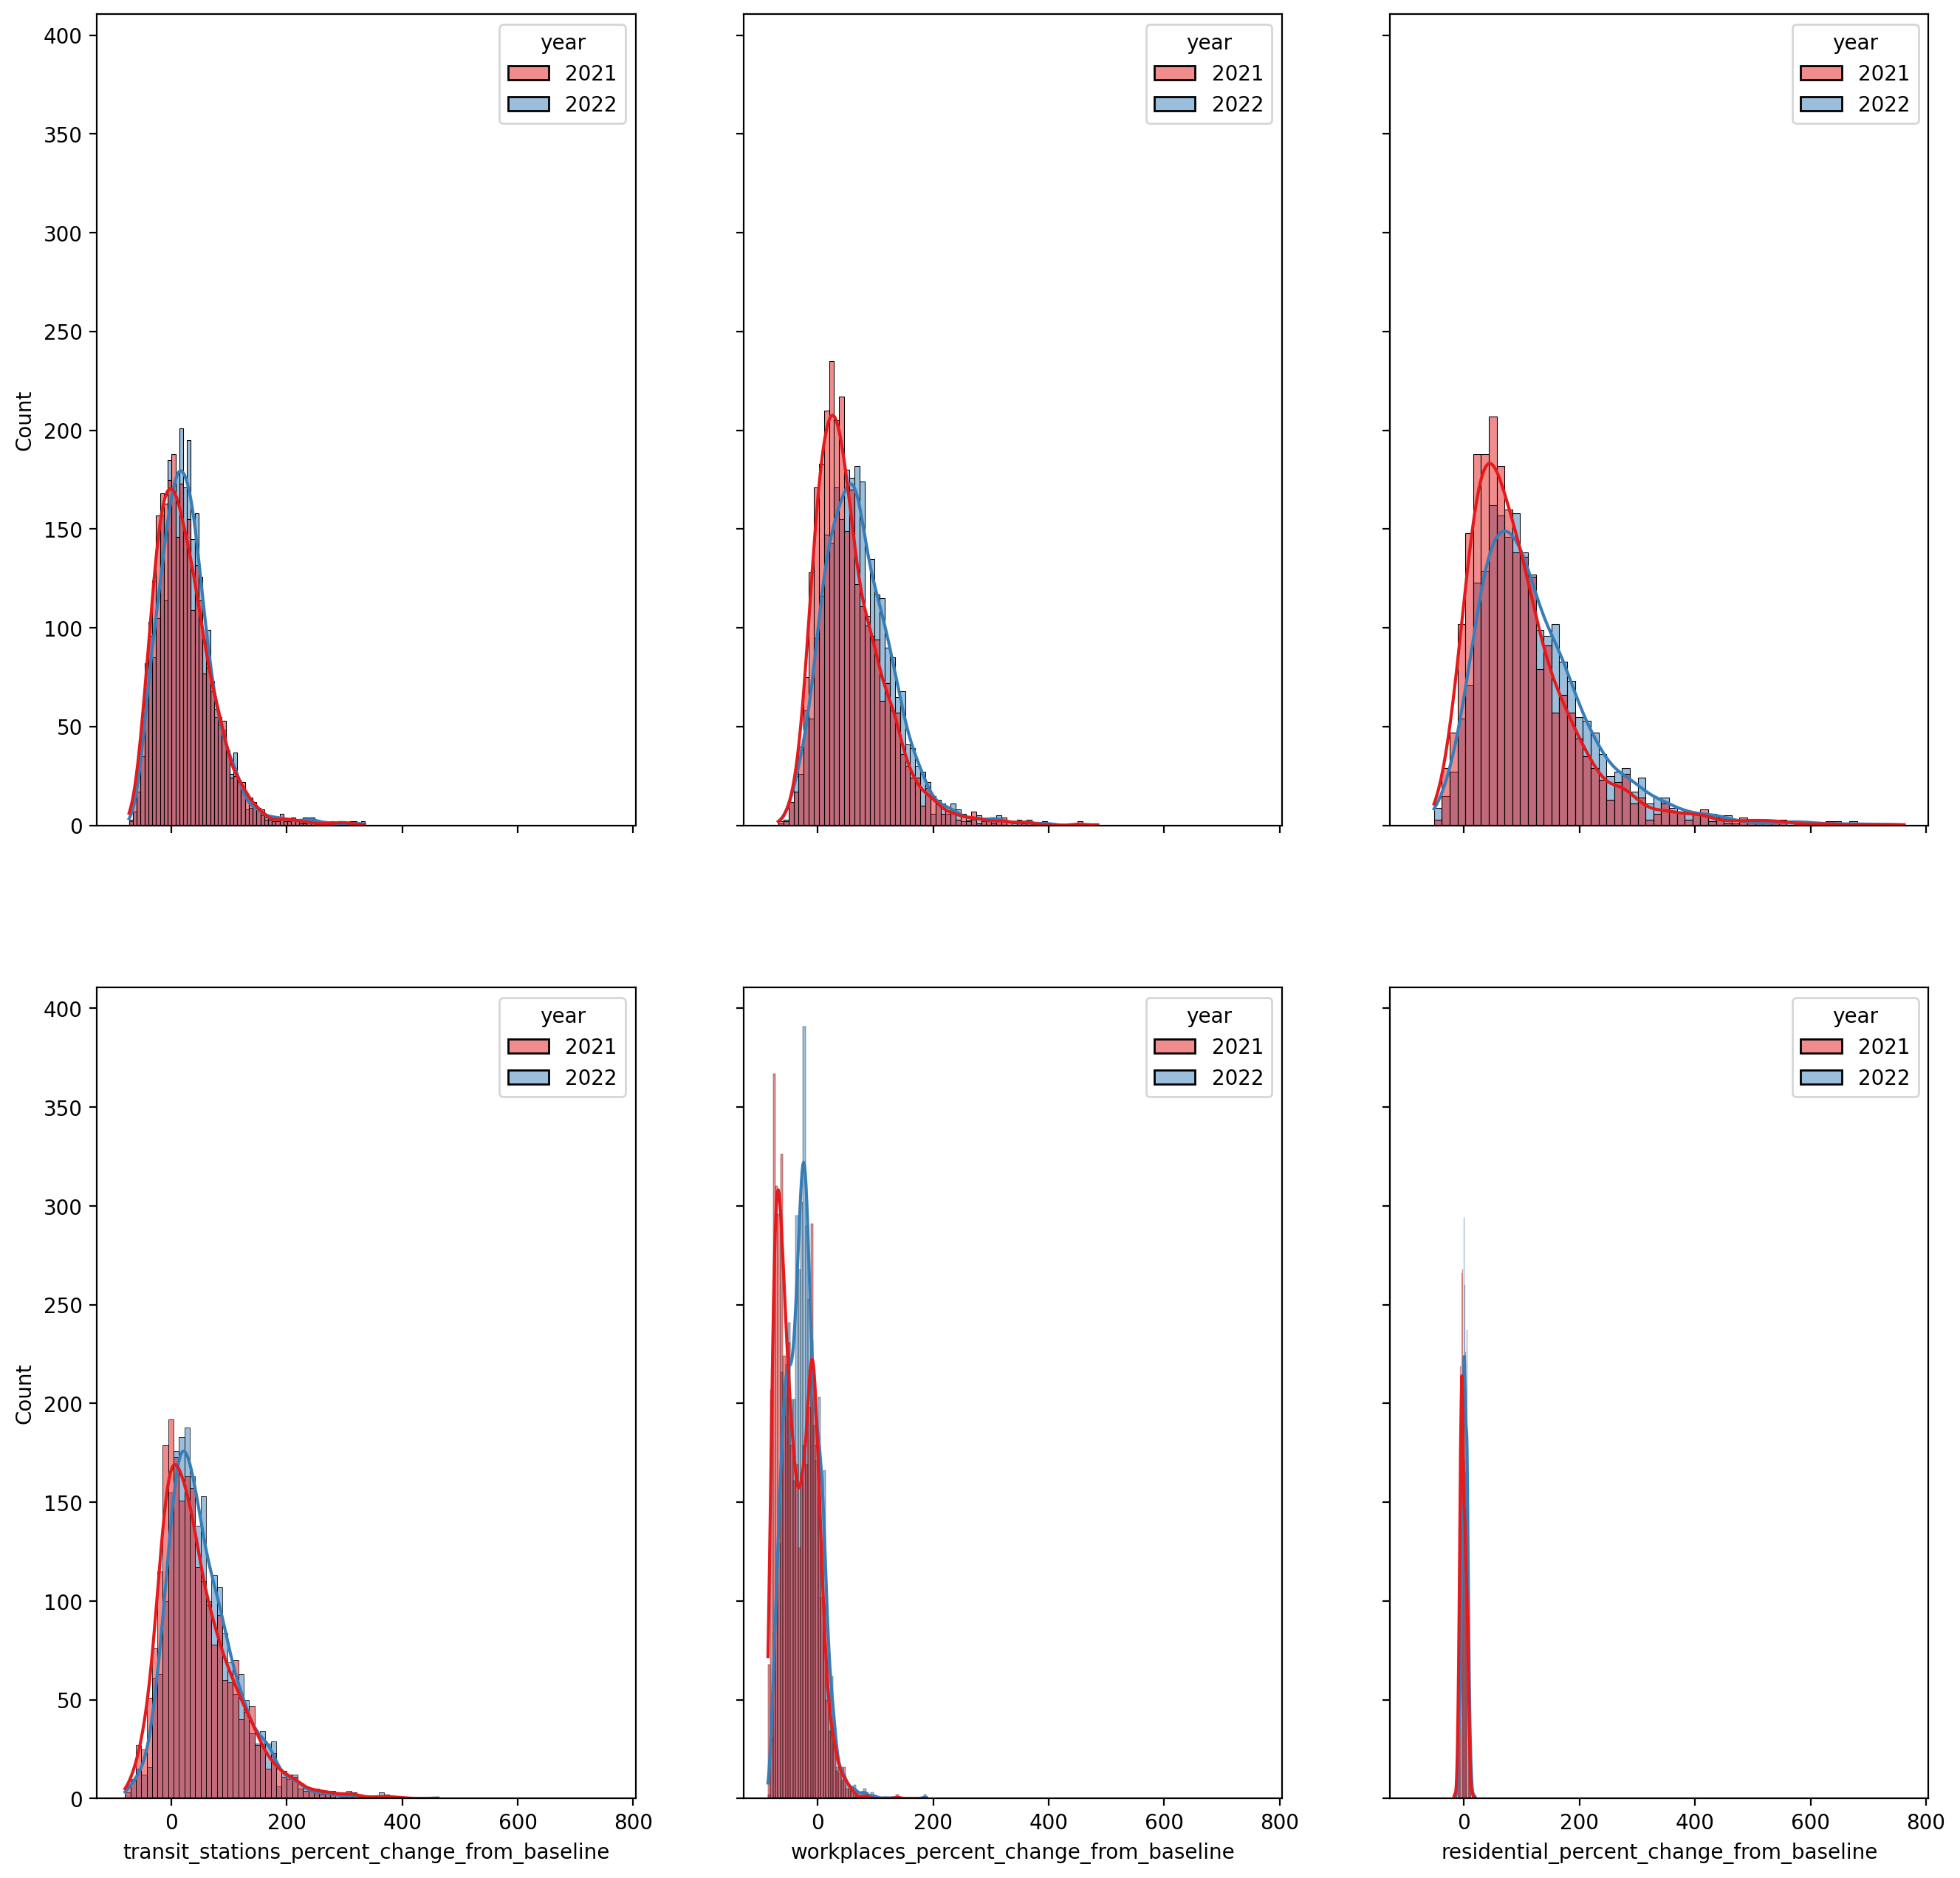

In [62]:
fig, axes = plt.subplots(2,3, sharex="all", sharey="all", dpi=200, figsize=(16,16))

sns.histplot(df_holiday, x=mobility_cols[0], hue="year", kde=True, fill=True, palette="Set1", ax = axes[0,0])


sns.histplot(df_holiday, x=mobility_cols[1], hue="year", kde=True, fill=True, palette="Set1",ax=axes[0,1])


sns.histplot(df_holiday, x=mobility_cols[2], hue="year", kde=True, fill=True, palette="Set1",ax=axes[0,2])


sns.histplot(df_holiday, x=mobility_cols[3], hue="year", kde=True, fill=True, palette="Set1",ax=axes[1,0])


sns.histplot(df_holiday, x=mobility_cols[4], hue="year", kde=True, fill=True, palette="Set1",ax=axes[1,1])


sns.histplot(df_holiday, x=mobility_cols[5], hue="year", kde=True, fill=True, palette="Set1",ax=axes[1,2]);


As seen in the Distribution Plot, the mobility change is normally distributed.

<br><br>

### 4.3. Implementation of Statistical Tests

<b>Checking for normal distribution:</b>

In [65]:
stats.shapiro(df_holiday[df_holiday["holiday"] == 1]["mean_percent_change"])

ShapiroResult(statistic=0.9194000959396362, pvalue=1.401298464324817e-45)

In [66]:
stats.shapiro(df_holiday[df_holiday["holiday"] == 2]["mean_percent_change"])

ShapiroResult(statistic=0.923997163772583, pvalue=1.2611686178923354e-44)

The result of the Shapiro Test indicates that we reject the null hypothesis because the p values are smaller than 0.05. Thus, we can conclude that the values are not normally distributed.

<br><br>

<b>Checking for homogeneity of variances:</b>

In [67]:
stats.levene(df_holiday[df_holiday["holiday"] == 2021]["mean_percent_change"], 
             df_holiday[df_holiday["holiday"] == 2022]["mean_percent_change"])

LeveneResult(statistic=12.488005670176827, pvalue=0.0004114299537424676)

The Levene Test Results indicates that we reject the null hypothesis. Since p is smaller than 0.05, the variances are not homogeneous. 

<br>

As a result of the normality tests, it is more appropriate to use <b>nonparametric tests</b> for comparison.<br><br>

**Nonparametric Independent Two Sample Test (Mann-Whitney U)**

In [68]:
stats.mannwhitneyu(df_holiday[df_holiday["holiday"] == 2021]["mean_percent_change"], 
             df_holiday[df_holiday["holiday"] == 2022]["mean_percent_change"])

MannwhitneyuResult(statistic=10742427.0, pvalue=5.867801839474038e-31)

Mann-Whitney U test indicates that we can reject the null hypothesis, so we can conclude that the difference is statistically significant.

<br>

<br>

## 5. Conclusion and Discussion

In this work, the mobility change from 2021 to 2022 during "Kurban Bayramı" holiday has increased significantly, whereas, the fuel prices has tripled. As a result, we can argue that the fuel prices has no significant effect on the mobility behavior. 

<br><br><br>

**Further Studies**

Machine Learning methods like regression and clustering may be conducted to investigate further. You can find some ML implementations in the following link.

https://github.com/DrFarukAydin/data-science-portfolio/blob/main/machine-learning/mobility-cluster.ipynb

The same dataframe is visualized with Tableau. You can check that from the following link: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/data-visualization-tableau/data-visualization-tableau.ipynb